# Sentiment analysis on Amazon Dataset

# About the dataset

In the dataset, class 1 is the negative and class 2 is the positive. Each class has 1,800,000 training samples

* polarity - 1 for negative and 2 for positive

* title - review heading

* text - review body

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Import Libraries

In [3]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import string
import string

import re

from nltk.corpus import stopwords


# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format



# 2. Data Preparation

Read the Data

In [10]:
# load the csv file
data=pd.read_csv("/content/drive/MyDrive/NLP Project/train.csv",names=['Review','Title','Text'])
data.head()

,Review,Title,Text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [11]:
# take 5% data randomly 
data=data.sample(frac=0.05).reset_index(drop=True)
data.head()

,Review,Title,Text
0,1,the title of the book is inaccurate,the 1975 red sox did not restore america's pas...
1,2,One of the greatest of Greatest Hits,This band was first seen by me in my hometown ...
2,2,Good Headphones,I ordered these headphones about a year ago. P...
3,2,Five Year Old,My five year old enjoys being able to play a D...
4,2,CAMobley Strikes again,After reading two other books written by Ms. M...


**Let us now see the number of variables and observations in the data.**

In [12]:
data.shape

(180000, 3)

**Interpretation:** The data has 18000 observations and 3 variables.

# Information of the dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Review  180000 non-null  int64 
 1   Title   179995 non-null  object
 2   Text    180000 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.1+ MB


**Interpretation:**From above output we see that review is numeric and review title and text are categorical

And all variables in correct datatype

# Check null value

In [14]:
data.isnull().sum()

Review    0
Title     5
Text      0
dtype: int64

**Interpretation:** Here we see that 30 null value in the dataset but we analyze review text so we drop review title column

# Remove insignificant variables

In [16]:
# drop column review title
data.drop("Title",axis=1,inplace=True)

#Again check null value
data.isnull().sum()


Review    0
Text      0
dtype: int64

In [18]:
# check unique value of review
data.Review.unique()

array([1, 2])

**Interpretation:**There are two unique values in the review column, 1 and 2.

In [19]:
# counts positive and negative review
data.Review.value_counts()

2    90300
1    89700
Name: Review, dtype: int64

**Interpretation:** Count the number of positive and negative review.

In [20]:
# add new column label 
data.Review.replace([1,2],[0,1],inplace=True)
data.head()

,Review,Text
0,0,the 1975 red sox did not restore america's pas...
1,1,This band was first seen by me in my hometown ...
2,1,I ordered these headphones about a year ago. P...
3,1,My five year old enjoys being able to play a D...
4,1,After reading two other books written by Ms. M...


**Interpretation:** Here we change value of review column for better understanding. Here we change positive for 1 and negative for 0 instand to 2 and 1.

<Axes: xlabel='Review', ylabel='count'>

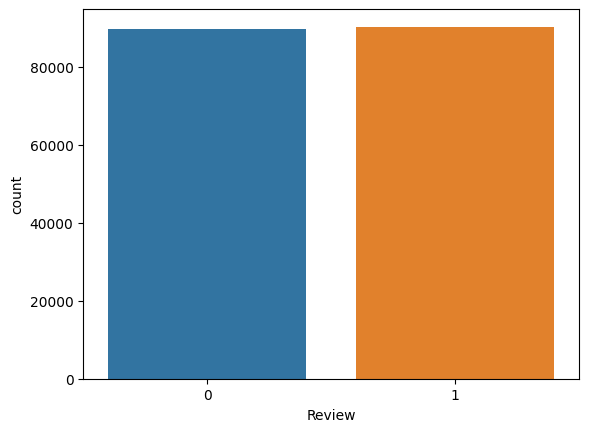

In [21]:
sns.countplot(x='Review',data=data)

**Interpretation:** Here we count positive and negative review and Positive reviews are more than negative reviews.

## Prepare data for sentiment analysis

In [22]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 43.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=586de0cb24a5022be7bcd2ff5270442d083b933519d76d3a3ea43ecc6f1ca8cb
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [23]:
# 1 detect language
from langdetect import detect

def language_code(row):
   try:
      return detect(row["Text"])
   except:
      return "Unknown"

data["language"] = data.apply(language_code, axis=1)
data.head()


,Review,Text,language
0,0,the 1975 red sox did not restore america's pas...,en
1,1,This band was first seen by me in my hometown ...,en
2,1,I ordered these headphones about a year ago. P...,en
3,1,My five year old enjoys being able to play a D...,en
4,1,After reading two other books written by Ms. M...,en


In [25]:
data.shape

(180000, 3)

**Interpreatation:** Here we detect language using langdetect library.

<Axes: xlabel='language', ylabel='count'>

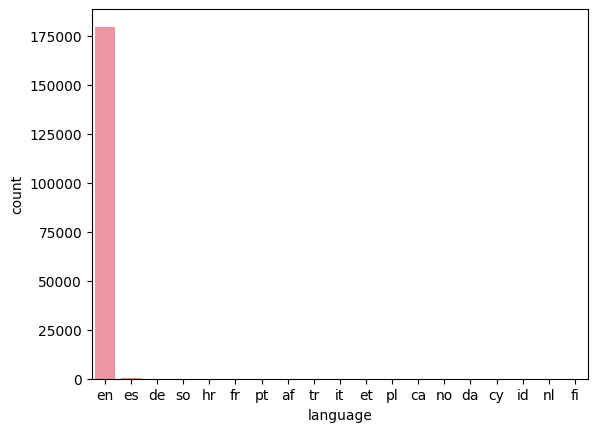

In [26]:
sns.countplot(x='language',data=data)

**Interpretation:** Bar graph of language column and english languae contain more value compare to other.

In [27]:
data[data.language!='en'].shape

(470, 3)

**Interpretation:** We see that review written in differnt differnt language not only english language.

In [28]:
# take only engligh language text
data = data[data["language"]=="en"].copy()
data.head()
data.shape

(179530, 3)

**Interpretation:** We take only english language dataframe.

In [29]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 26.4 MB/s eta 0:00:00


In [30]:
# 2 contractions
# like we convert I'm to I am or won't to will not
import contractions

def text_with_contractions(text):
    text = [contractions.fix(word) for word in text.split(" ")]
    return ' '.join(text)

data["Clean_Review"] = data["Text"].apply(lambda x: text_with_contractions(x))
data.head()

,Review,Text,language,Clean_Review
0,0,the 1975 red sox did not restore america's pas...,en,the 1975 red sox did not restore america's pas...
1,1,This band was first seen by me in my hometown ...,en,This band was first seen by me in my hometown ...
2,1,I ordered these headphones about a year ago. P...,en,I ordered these headphones about a year ago. P...
3,1,My five year old enjoys being able to play a D...,en,My five year old enjoys being able to play a D...
4,1,After reading two other books written by Ms. M...,en,After reading two other books written by Ms. M...


**Interpretation:** In this code, we can see how contractions can be used to change I've to I have and I'm to I am in the same way.

In [31]:
# 3 convert to lower case and remove puncutation,stopword,digits,empty data
import nltk
nltk.download('stopwords')
def clean_text(text):
    # lower text
    text = text.lower()

    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]

    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]

    # remove stop words
    stop = stopwords.words('english')
    stop = [w for w in stop if w not in ['not', 'no']]
    text = [x for x in text if (x not in stop)]

    # remove empty tokens
    text = [t for t in text if len(t) > 0]

    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    return(text)

# clean text data
data["Clean_Review"] = data["Clean_Review"].apply(lambda x: clean_text(x))
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Review,Text,language,Clean_Review
0,0,the 1975 red sox did not restore america's pas...,en,red sox not restore america's passion baseball...
1,1,This band was first seen by me in my hometown ...,en,band first seen hometown canberra australia au...
2,1,I ordered these headphones about a year ago. P...,en,ordered headphones year ago pretty reasonable ...
3,1,My five year old enjoys being able to play a D...,en,five year old enjoys able play ddr game age ol...
4,1,After reading two other books written by Ms. M...,en,reading two books written ms mobley found book...


**Interpretation:** Convert the text to lower case, and then remove punctuation, stopwords, digits, and empty spaces.

In [32]:
# 4 lammatisation 
# Doing for featch root word
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def apply_lammatisation(text):
  lemmatizer=WordNetLemmatizer()
  text = [lemmatizer.lemmatize(i) for i in text.split(" ")]
  return ' '.join(text)
 
# clean text data
data["Clean_Review"] = data["Clean_Review"].apply(lambda x: apply_lammatisation(x))
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,Review,Text,language,Clean_Review
0,0,the 1975 red sox did not restore america's pas...,en,red sox not restore america's passion baseball...
1,1,This band was first seen by me in my hometown ...,en,band first seen hometown canberra australia au...
2,1,I ordered these headphones about a year ago. P...,en,ordered headphone year ago pretty reasonable q...
3,1,My five year old enjoys being able to play a D...,en,five year old enjoys able play ddr game age ol...
4,1,After reading two other books written by Ms. M...,en,reading two book written m mobley found book o...


**Interpretation:** Using lemmatization, we can reduce inflected words to their root words based on their context and usage within the sentence.

In [35]:
def tweet_len(row):
    return len(row["Clean_Review"])

data["Text_length"] = data.apply(tweet_len, axis=1)
data.head()

,Review,Text,language,Clean_Review,Text_length
0,0,the 1975 red sox did not restore america's pas...,en,red sox not restore america's passion baseball...,596
1,1,This band was first seen by me in my hometown ...,en,band first seen hometown canberra australia au...,202
2,1,I ordered these headphones about a year ago. P...,en,ordered headphone year ago pretty reasonable q...,401
3,1,My five year old enjoys being able to play a D...,en,five year old enjoys able play ddr game age ol...,103
4,1,After reading two other books written by Ms. M...,en,reading two book written m mobley found book o...,196


**Interpretation:** Here we Count length of review_clean text.

Text(0, 0.5, 'Frequency')

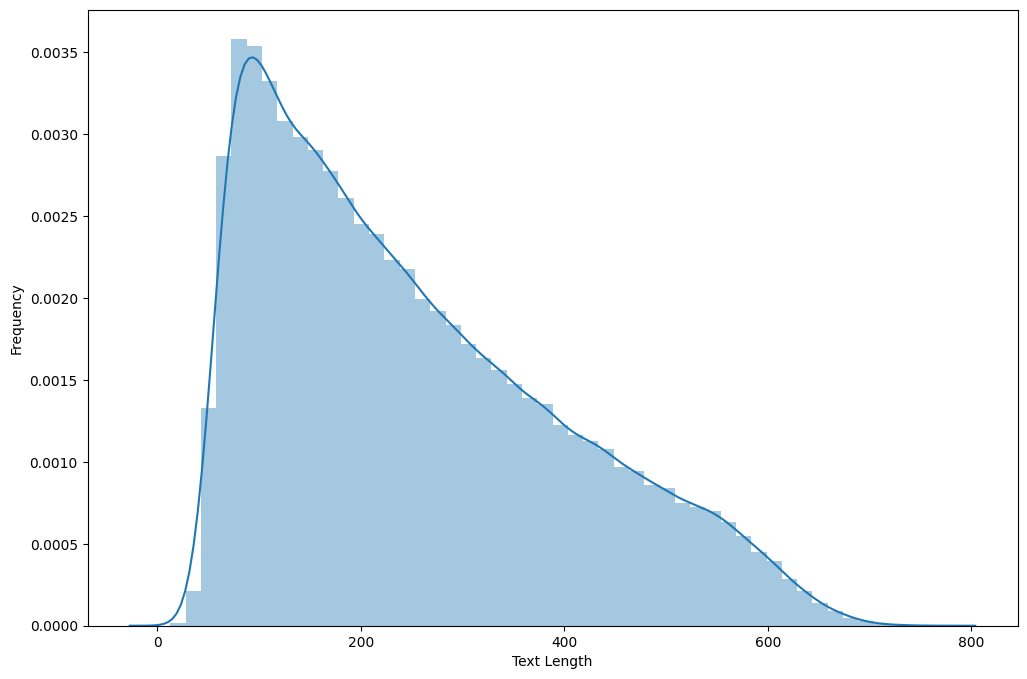

In [36]:
# histogram plot of text length
plt.figure(figsize=(12,8))
sns.distplot(data['Text_length'])
plt.xlabel("Text Length")
plt.ylabel("Frequency")

**Interpretation:** Mostly text written in 20 to 200 word.

In [37]:
# count each word of clean_text
from collections import Counter

word_counter = Counter()
for row in data.to_dict("records"):
    word_counter.update(row["Clean_Review"].split())
df_new = pd.DataFrame(word_counter.most_common(30))
df_new.columns = ["term", "frequency"]
df_new

,term,frequency
0,not,183503
1,book,99923
2,one,65581
3,would,50498
4,like,49960
5,good,41017
6,great,39122
7,time,38169
8,get,36723
9,read,31599


**Interpretation:** Count the frequency of each word that present in review_clean column.Mostly

In [ ]:
# language wise make graph

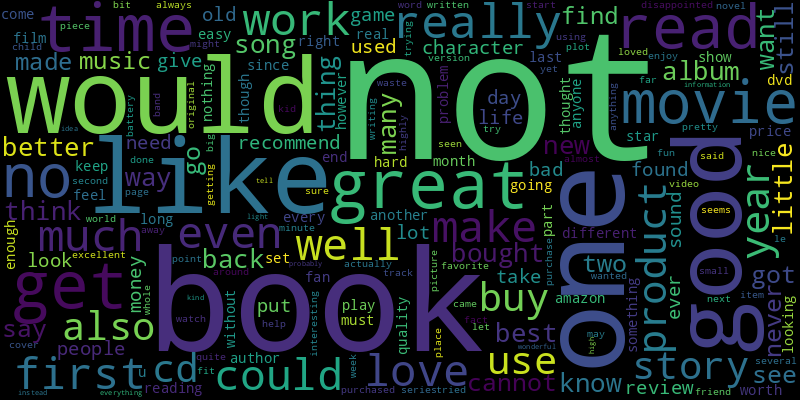

In [38]:
# wordcloud 
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=400)
cloud.generate_from_frequencies(dict(word_counter.most_common(200)))
image = cloud.to_image()
image.show()


**Interpretation:** Make Wordcloud graph base on most 30 comman word in text.Useful for viewing and analyzing words that are frequently used.
Most publics are give them reviews in books.

# LDA(Linear discriminant analysis)

In [39]:
import gensim
import gensim.corpora as corpora
#comment body 

from pprint import pprint

documents = [comment.split() for comment in data["Clean_Review"]]
vocab = corpora.Dictionary(documents)
corpus = [vocab.doc2bow(text) for text in documents]

num_topics = 10
lda = gensim.models.LdaMulticore(corpus=corpus, id2word=vocab, num_topics=num_topics)
pprint(lda.print_topics())


[(0,
  '0.012*"not" + 0.011*"coffee" + 0.010*"food" + 0.009*"recipe" + 0.008*"make" '
  '+ 0.008*"taste" + 0.006*"water" + 0.005*"cup" + 0.005*"like" + 0.004*"pot"'),
 (1,
  '0.030*"not" + 0.012*"one" + 0.010*"like" + 0.010*"would" + 0.009*"great" + '
  '0.009*"get" + 0.008*"use" + 0.007*"time" + 0.007*"love" + 0.007*"year"'),
 (2,
  '0.022*"not" + 0.021*"game" + 0.021*"book" + 0.008*"good" + '
  '0.007*"information" + 0.006*"would" + 0.006*"get" + 0.006*"great" + '
  '0.005*"use" + 0.005*"much"'),
 (3,
  '0.089*"movie" + 0.042*"film" + 0.011*"plot" + 0.010*"scene" + '
  '0.010*"horror" + 0.008*"action" + 0.008*"acting" + 0.007*"actor" + '
  '0.005*"documentary" + 0.005*"director"'),
 (4,
  '0.027*"album" + 0.026*"cd" + 0.025*"song" + 0.019*"music" + 0.015*"not" + '
  '0.014*"one" + 0.014*"like" + 0.013*"great" + 0.010*"love" + 0.010*"good"'),
 (5,
  '0.049*"not" + 0.024*"movie" + 0.014*"dvd" + 0.014*"like" + 0.013*"one" + '
  '0.011*"would" + 0.009*"good" + 0.009*"bad" + 0.009*"get" +

**Interpretation:** Here we perform LDA for the classify text in a document to a particular topic or not.

# Sentiment Analysis

In [40]:
# sentiment analysis

import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define function to calculate sentiment scores for a given text
def get_sentiment_scores(text):
    if type(text) == str:
        scores = sia.polarity_scores(text)
        return scores['compound']
    else:
        return 0.0

# Convert values in the 'cleaned_body' column to strings
data['Clean_Review'] = data['Clean_Review'].astype(str)

# Calculate sentiment scores for each row in the DataFrame
data['Sentiment_score'] = data['Clean_Review'].apply(get_sentiment_scores)

# Print the first 5 rows of the DataFrame
data.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Review,Text,language,Clean_Review,Text_length,Sentiment_score
0,0,the 1975 red sox did not restore america's pas...,en,red sox not restore america's passion baseball...,596,0.877500
1,1,This band was first seen by me in my hometown ...,en,band first seen hometown canberra australia au...,202,0.942300
2,1,I ordered these headphones about a year ago. P...,en,ordered headphone year ago pretty reasonable q...,401,0.938100
3,1,My five year old enjoys being able to play a D...,en,five year old enjoys able play ddr game age ol...,103,0.902200
4,1,After reading two other books written by Ms. M...,en,reading two book written m mobley found book o...,196,0.743000


**Interpretation:** Perform sentiment analysis using vader library and get the sentiment score

In [41]:
data['Sentiment_score'].describe()

count   179530.000000
mean         0.376138
std          0.606481
min         -0.996600
25%         -0.066175
50%          0.636900
75%          0.888500
max          0.998400
Name: Sentiment_score, dtype: float64

**Interpretation:** Here we do statistical analysis on sentiment score

<Axes: xlabel='Sentiment_score', ylabel='Count'>

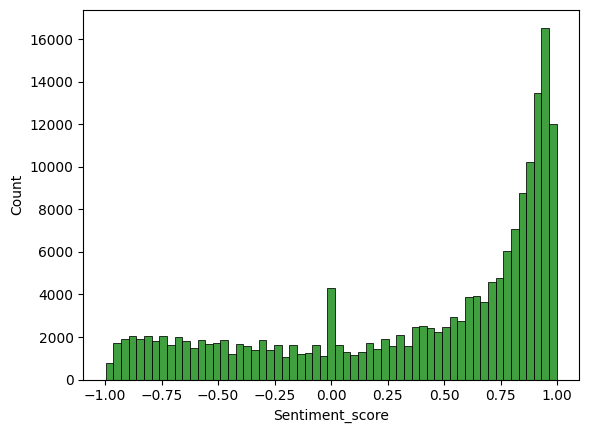

In [42]:
#Plot a distplot of the normalised score
sns.histplot(data['Sentiment_score'],color='g')

**Interpretation:** Here we see that graph is negetive skewed i.e. negative and netural reaction also present.

In [43]:
pip install vaderSentiment 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.3 MB/s eta 0:00:00


In [44]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [45]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Create an instance of the SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def get_sentiment(row):
    text = row['Clean_Review']
    scores = analyser.polarity_scores(text)
    if scores['compound'] >= 0.6:
        return 'Positive'
    elif scores['compound'] <= -0.6:
        return 'Negative'
    else:
        return 'Netural'

# Apply the get_sentiment function to each row of the dataframe
data['Sentiment_Reaction_Of_Vader'] = data.apply(get_sentiment, axis=1)

In [46]:
data.head()

,Review,Text,language,Clean_Review,Text_length,Sentiment_score,Sentiment_Reaction_Of_Vader
0,0,the 1975 red sox did not restore america's pas...,en,red sox not restore america's passion baseball...,596,0.877500,Positive
1,1,This band was first seen by me in my hometown ...,en,band first seen hometown canberra australia au...,202,0.942300,Positive
2,1,I ordered these headphones about a year ago. P...,en,ordered headphone year ago pretty reasonable q...,401,0.938100,Positive
3,1,My five year old enjoys being able to play a D...,en,five year old enjoys able play ddr game age ol...,103,0.902200,Positive
4,1,After reading two other books written by Ms. M...,en,reading two book written m mobley found book o...,196,0.743000,Positive


<Axes: xlabel='Sentiment_Reaction_Of_Vader', ylabel='count'>

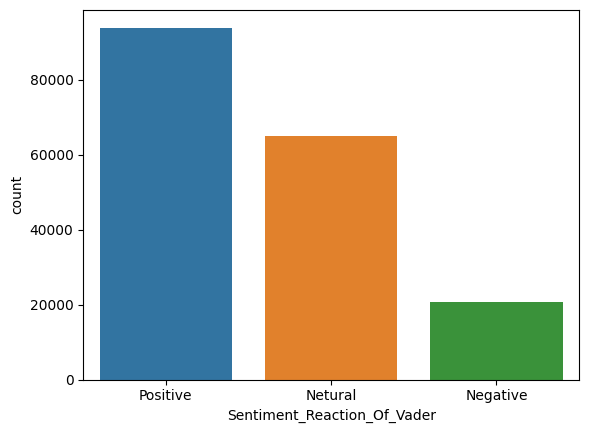

In [47]:
sns.countplot(x='Sentiment_Reaction_Of_Vader',data=data)

# Sentiment analysis using textblob library

In [48]:
# Give positive,negative and netual reaction to text
import nltk
nltk.download('punkt')

import nltk
nltk.download('movie_reviews')
  
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

analyser=NaiveBayesAnalyzer()

def bayes_sentiment_class(row):
  blob=TextBlob(row['Clean_Review'],analyzer=analyser)
  sentiment = blob.sentiment

  if sentiment.p_pos>=0.6:
    return "Positive"

  elif sentiment.p_neg>=0.6:
    return "Negative"

  else:
    return "Netural"

data['Sentiment_Reaction_Of_Textblob']=data.apply(bayes_sentiment_class,axis=1)
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


,Review,Text,language,Clean_Review,Text_length,Sentiment_score,Sentiment_Reaction_Of_Vader,Sentiment_Reaction_Of_Textblob
0,0,the 1975 red sox did not restore america's pas...,en,red sox not restore america's passion baseball...,596,0.877500,Positive,Positive
1,1,This band was first seen by me in my hometown ...,en,band first seen hometown canberra australia au...,202,0.942300,Positive,Positive
2,1,I ordered these headphones about a year ago. P...,en,ordered headphone year ago pretty reasonable q...,401,0.938100,Positive,Positive
3,1,My five year old enjoys being able to play a D...,en,five year old enjoys able play ddr game age ol...,103,0.902200,Positive,Positive
4,1,After reading two other books written by Ms. M...,en,reading two book written m mobley found book o...,196,0.743000,Positive,Positive


**Interpretation:** Base on score we detect positive, negative and netural reaction using NaiveBayesAnalyzer.

In [49]:
# differnce between vedar and textbox sentiment analysis
import sklearn
print(sklearn.metrics.confusion_matrix(data['Sentiment_Reaction_Of_Vader'], data['Sentiment_Reaction_Of_Textblob']))

[[ 8689  2016  9916]
 [19682  8095 37211]
 [13182  6769 73970]]


In [50]:
# value counts of bayes_sentiment
data['Sentiment_Reaction_Of_Textblob'].value_counts()

Positive    121097
Negative     41553
Netural      16880
Name: Sentiment_Reaction_Of_Textblob, dtype: int64

In [51]:
# value counts of vader_sentiment
data['Sentiment_Reaction_Of_Vader'].value_counts()

Positive    93921
Netural     64988
Negative    20621
Name: Sentiment_Reaction_Of_Vader, dtype: int64

<Axes: xlabel='Sentiment_Reaction_Of_Textblob', ylabel='count'>

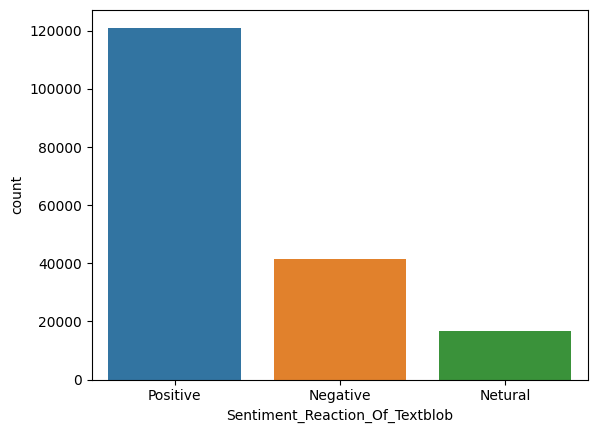

In [52]:
# countplot of sentiment analysis
sns.countplot(x='Sentiment_Reaction_Of_Textblob',data=data)

**Interpretation:** Here we see that Positive reaction more than another two.

In [53]:
# Make positive text dataframe
data_positive=data[data.Sentiment_Reaction_Of_Vader=='Positive']
data_positive.head()

,Review,Text,language,Clean_Review,Text_length,Sentiment_score,Sentiment_Reaction_Of_Vader,Sentiment_Reaction_Of_Textblob
0,0,the 1975 red sox did not restore america's pas...,en,red sox not restore america's passion baseball...,596,0.877500,Positive,Positive
1,1,This band was first seen by me in my hometown ...,en,band first seen hometown canberra australia au...,202,0.942300,Positive,Positive
2,1,I ordered these headphones about a year ago. P...,en,ordered headphone year ago pretty reasonable q...,401,0.938100,Positive,Positive
3,1,My five year old enjoys being able to play a D...,en,five year old enjoys able play ddr game age ol...,103,0.902200,Positive,Positive
4,1,After reading two other books written by Ms. M...,en,reading two book written m mobley found book o...,196,0.743000,Positive,Positive


In [54]:
# count each word of Positive text
from collections import Counter

word_counter = Counter()
for row in data_positive.to_dict("records"):
    word_counter.update(row["Clean_Review"].split())
df_pos = pd.DataFrame(word_counter.most_common(30))
df_pos.columns = ["term", "frequency"]
df_pos

,term,frequency
0,not,83782
1,book,57899
2,one,36868
3,great,32580
4,like,31729
5,good,27520
6,would,26716
7,time,20755
8,love,20096
9,get,19609


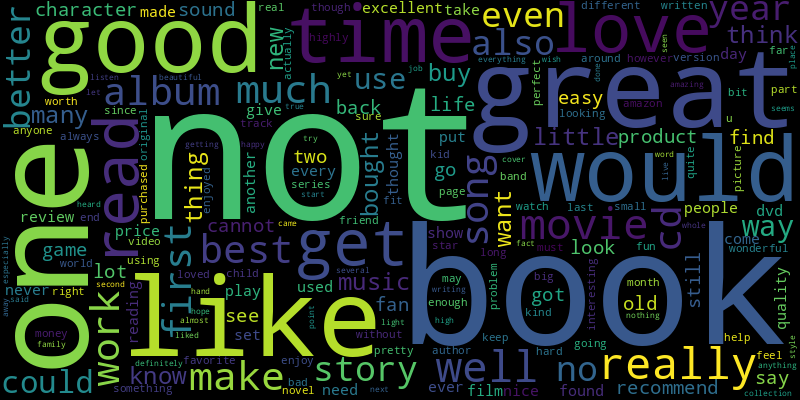

In [55]:
# wordcloud 
from wordcloud import WordCloud
#cloud = WordCloud(background_color = "white", max_words = 200)
cloud = WordCloud(width=800, height=400)
cloud.generate_from_frequencies(dict(word_counter.most_common(200)))
image = cloud.to_image()
image.show()


**Interpretation:**Most of the book's base product reviews are postive. 

# Conclusion:

* Sentiment analysis of Amazon reviews involves using natural language processing (NLP) techniques to identify the sentiment or emotional tone of the reviews. The sentiment can be positive, negative, or neutral.

* Interpretation of sentiment analysis results for Amazon reviews can provide valuable insights into customer sentiment towards specific products or brands. Positive sentiment could indicate that customers are satisfied with the product or service, while negative sentiment could suggest that customers are dissatisfied or have had a poor experience.

* Interpretation of the sentiment analysis results can also help companies identify areas of improvement in their products or services, and make data-driven decisions to improve customer satisfaction. Additionally, companies can use sentiment analysis to track changes in customer sentiment over time, which can be useful for monitoring the impact of marketing campaigns or product updates.

* However, it is important to note that sentiment analysis has its limitations. It is not always 100% accurate and may struggle to interpret sarcasm, irony, or other forms of figurative language. It is also important to consider other factors that may affect customer sentiment, such as product quality, pricing, and customer service, as sentiment analysis alone cannot provide a complete picture of customer satisfaction.
